In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bsp

In [2]:
url17 = "https://www2.2019seagames.com/countries/"
url19 = "https://rs.2019seagames.com/RS2019/mobiapp/MedalTally"
web17 = requests.get(url17)
web19 = requests.get(url19)
data17 = bsp(web17.content, "html.parser")
data19 = bsp(web19.content, "html.parser")

In [3]:
temp17 = []
for i in data17.find_all("em"):
    temp17.append(i.text)
cr17 = []
for i in range(0,len(temp17)//2,6):
    cr17.append(temp17[i])
gold17 = []
for i in range(2,len(temp17)//2,6):
    gold17.append(int((temp17[i]).split()[1]))
    
(list(zip(cr17,gold17)))

[('BRUNEI DARUSALLAM', 0),
 ('CAMBODIA', 3),
 ('INDONESIA', 38),
 ('LAO PEOPLE’S DEMOCRATIC REPUBLIC', 2),
 ('MALAYSIA', 145),
 ('MYANMAR', 7),
 ('PHILIPPINES', 24),
 ('SINGAPORE', 57),
 ('THAILAND', 72),
 ('TIMOR LESTE', 0),
 ('VIETNAM', 58)]

In [5]:
stage = []
for i in data19.find_all("td"):
    stage.append(i.text)
stage = [item.strip() for item in stage if str(item)]

cr19 = []
for i in range(0,len(stage),5):
    cr19.append(stage[i])
gld19 = []
for i in range(1,len(stage),5):
    gld19.append(int(stage[i]))

(list(zip(cr19,gld19)))

[('PHILIPPINES', 149),
 ('VIETNAM', 98),
 ('THAILAND', 92),
 ('INDONESIA', 72),
 ('MALAYSIA', 55),
 ('SINGAPORE', 53),
 ('MYANMAR', 4),
 ('CAMBODIA', 4),
 ('BRUNEI DARUSSALAM', 2),
 ('LAO PDR', 1),
 ('TIMOR-LESTE', 0)]

In [6]:
m19 = list(zip(cr19,gld19))
m19.sort()

In [7]:
cr19anyar = []
for i in range(len(m19)):
    cr19anyar.append(m19[i][0])
gld19new = []
for i in range(len(m19)):
    gld19new.append(m19[i][1])

(list(zip(cr19,gld19new)))

[('PHILIPPINES', 2),
 ('VIETNAM', 4),
 ('THAILAND', 72),
 ('INDONESIA', 1),
 ('MALAYSIA', 55),
 ('SINGAPORE', 4),
 ('MYANMAR', 149),
 ('CAMBODIA', 53),
 ('BRUNEI DARUSSALAM', 92),
 ('LAO PDR', 0),
 ('TIMOR-LESTE', 98)]

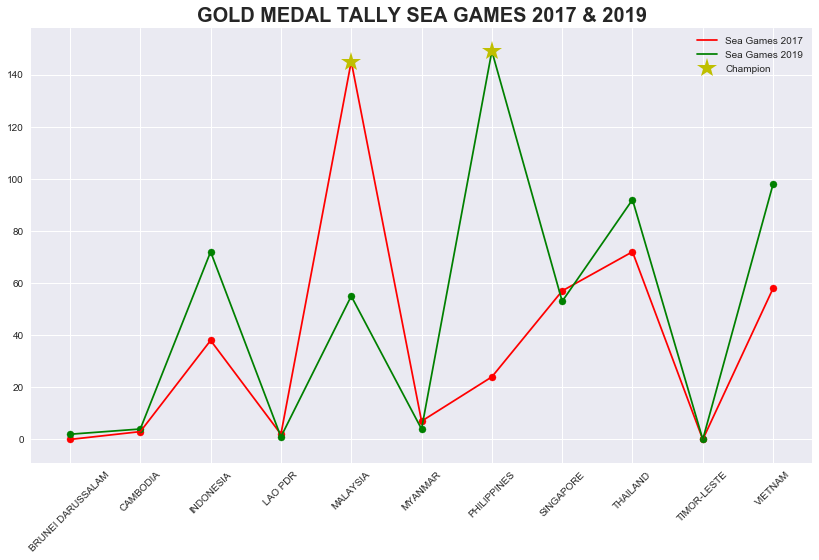

In [15]:
plt.style.use("seaborn")
plt.figure(figsize= (14,8))
#membuat line
plt.plot(cr19anyar, gold17, "r", markersize=10)
plt.plot(cr19anyar, gld19new, "g", markersize=10)

#membuat scatter
plt.scatter(cr19anyar, gold17, color="r", s=50)
plt.scatter(cr19anyar, gld19new, color="g", s=50)

plt.plot(cr19anyar[gld19new.index(max(gld19new))], max(gld19new), "y*", markersize=20)
plt.plot(cr19anyar[gold17.index(max(gold17))], max(gold17), "y*", markersize=20)

plt.grid(True)
plt.legend(["Sea Games 2017", "Sea Games 2019", "Champion"])
plt.title("GOLD MEDAL TALLY SEA GAMES 2017 & 2019", size=20, fontweight="bold")
plt.xticks(rotation=45)
plt.show()

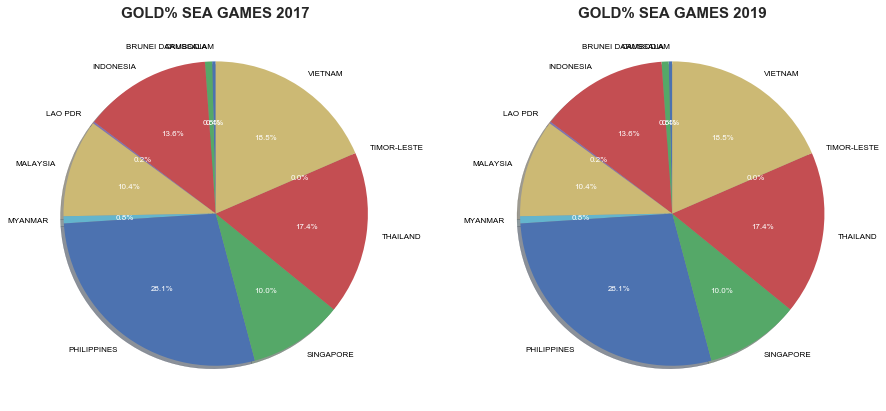

In [17]:
sea = plt.figure(figsize= (15,10))

#Persentase medali 2017
sea.add_subplot(121)
x,y,z = plt.pie (gld19new, labels=cr19anyar, startangle=90,
        shadow= True,textprops={"size":8, "color":"k"},
        autopct = "%1.1f%%", radius=1)
plt.title("GOLD% SEA GAMES 2017", size= 15, fontweight="bold")
for i in z:
    i.set_color("white")

#Persentase medali 2019    
sea.add_subplot(122)
t,u,v = plt.pie (gld19new, labels=cr19anyar, startangle=90,
        shadow= True,textprops={"size":8, "color":"k"},
        autopct = "%1.1f%%", radius=1)
plt.title("GOLD% SEA GAMES 2019", size= 15, fontweight="bold")
for i in v:
    i.set_color("white")
plt.show()
